## Machine Learning Final Project

In [48]:
# Import all libraries required
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

In [49]:
#Import dataset
df = pd.read_excel('40192_2013_16_MOESM1_ESM.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null    float6

C:\Users\divam\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#### We can see that none of the data is missing from the dataset and hence the data is already processed. No prepocessing is required

### 1. EDA

In [50]:
#Function used to provide statistical insight of the dataframe
df.describe()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,219.000000,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,126.295289,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,1.000000,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,110.000000,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,219.000000,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,328.000000,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,437.000000,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


In [51]:
# Drop the serial number column from the dataset for preventing any errors in the model
df.drop('Sl. No.', axis=1, inplace=True)

In [52]:
# Data scaling using z-score approach 
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

df_std

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,1.203746,-0.595127,-1.338343,-1.176664,-0.792909,-0.171244,0.734739,2.017972,3.102949,-1.721432
1,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,0.389195,-0.512968,-1.095210,0.248847,-0.792909,-0.544536,2.022669,-0.412047,3.102949,-1.705339
2,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,0.063375,-0.583390,-1.314030,-1.176664,-0.792909,0.601383,0.734739,2.017972,-0.741101,-1.705339
3,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,1.529567,-0.595127,-1.338343,-1.176664,-0.792909,1.417416,0.412757,-0.412047,-0.741101,-1.673153
4,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,1.203746,-0.595127,-1.338343,-0.973020,-0.792909,-0.171244,-0.231208,2.017972,-0.741101,-1.758982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2.203807,-2.529863,-2.531162,-1.360296,2.846782,2.363933,2.893723,4.167558,5.387831,-2.299022,...,1.529567,-0.583390,0.825539,-1.176664,0.911195,-1.186945,0.090774,0.802963,-0.741101,2.559297
433,2.203807,-2.529863,-2.531162,-1.360296,2.846782,2.363933,2.893723,4.167558,5.387831,-2.299022,...,0.063375,-0.524705,1.238865,0.248847,0.911195,-0.683435,-0.971768,0.073957,0.027709,2.167701
434,2.203807,-2.529863,-2.531162,-1.360296,2.846782,2.363933,2.893723,4.167558,1.263492,-2.054992,...,0.715016,-0.536442,1.457684,0.045203,1.138409,-0.405637,1.056722,-0.412047,-0.741101,2.956257
435,2.203807,-2.529863,-2.531162,-1.360296,2.846782,2.363933,2.893723,4.167558,1.263492,-2.054992,...,1.529567,-0.583390,0.825539,-1.176664,0.911195,-1.186945,0.090774,0.802963,-0.741101,2.441282


In [53]:
# Arrange scaled data into features and target variables
X = df_std[['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT', 'TT', 'Tt',
       'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo', 'RedRatio',
       'dA', 'dB', 'dC']]
y = df_std['Fatigue']

In [54]:
from sklearn.feature_selection import mutual_info_regression

In [55]:
importances = mutual_info_regression(X,y)

In [56]:
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])

Text(0, 0.5, 'Information Gain')

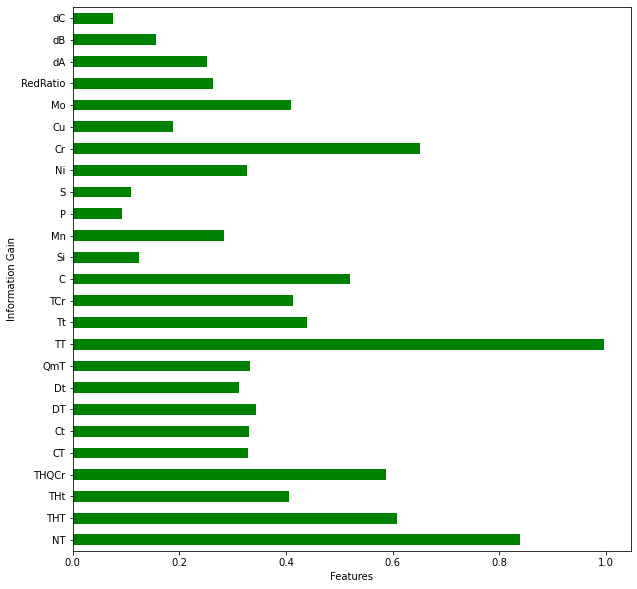

In [57]:
feat_importances.plot(kind = 'barh' , color = 'green', figsize = (10,10))
plt.xlabel("Features")
plt.ylabel("Information Gain")

In [58]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### 2. Linear Regression Model

In [60]:
#Import Libraries
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
#Import Libraries
from sklearn.model_selection import  KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.metrics import r2_score

In [63]:
#Fit Training data using linear regression
model_CV = lm.fit(X_train, y_train)

In [64]:
#define cross-validation method to use
cv  = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores_MAE = cross_val_score(model_CV, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model_CV, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)
scores_MSE = cross_val_score(model_CV, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [65]:
# Performance Evaluation Metrics
from sklearn import metrics
print('Linear Regression MAE:', mean(absolute(scores_MAE)))
print('Linear Regression RMSE:', sqrt(mean(absolute(scores_MSE))))
print('Linear Regression R squared:', mean(absolute(scores_r2)))
print('Linear Regression R squared:', sqrt(mean(absolute(scores_r2))))

Linear Regression MAE: 0.13224865699770572
Linear Regression RMSE: 0.18422301621857967
Linear Regression R squared: 0.9623566225857271
Linear Regression R squared: 0.9809977688994644


In [66]:
# Predict target variable from the cross fold validation 
from sklearn.model_selection import cross_val_predict
predicted_CV_LM = cross_val_predict(lm, X_test, y_test, cv=cv)

Text(0.5, 1.0, ' Scatter Plot for Predicted Vs Actual Fatigue Strength')

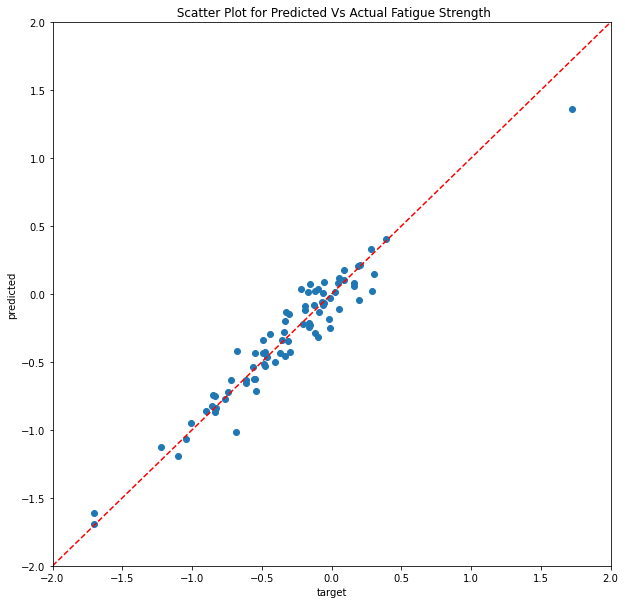

In [67]:
#Plot Actual versus the predicted fatigue strength
plt.figure(figsize=(10, 10))
plt.scatter(y_test,predicted_CV_LM)
# dashed diagonal line
plt.plot([-2,2], [-2, 2], 'r--')
# x and y axis range
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# x and y labels|
plt.xlabel("target")
plt.ylabel("predicted")
plt.title(" Scatter Plot for Predicted Vs Actual Fatigue Strength")

### 3. Support Vector Machine

In [68]:
# Import Libraries
from sklearn import svm

In [69]:
model = svm.SVR()

In [70]:
model.fit(X_train,y_train)

SVR()

In [71]:
predicted_SVC = model.predict(X_test)

#### 3.1 Performance Evaluation before Kfold cross validation using grid search

In [72]:
#Performance Evaluation metrics
print('SVC MAE:', metrics.mean_absolute_error(y_test,predicted_SVC))
print('SVC RMSE:', sqrt(metrics.mean_squared_error(y_test,predicted_SVC)))
print('SVC R squared:', metrics.r2_score(y_test,predicted_SVC))
print('SVC R squared:', sqrt(metrics.r2_score(y_test,predicted_SVC)))

SVC MAE: 0.10055158899376065
SVC RMSE: 0.15129907561259526
SVC R squared: 0.9723760435249093
SVC R squared: 0.9860912957352931


In [73]:
# Set grid parameters for cross fold 
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
grid_SVC = GridSearchCV(model,param_grid,refit=True,verbose=10,cv=cv, scoring ='neg_mean_absolute_error')

In [76]:
grid_SVC.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 1/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.708 total time=   0.0s
[CV 2/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 2/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.404 total time=   0.0s
[CV 3/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 3/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.551 total time=   0.0s
[CV 4/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 4/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.658 total time=   0.0s
[CV 5/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 5/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.922 total time=   0.0s
[CV 6/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 6/10; 1/25] END C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='neg_mean_absolute_error', verbose=10)

In [77]:
# Best paramter set for the SVM model
grid_SVC.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [78]:
grid_SVC.best_estimator_

SVR(C=100, gamma=0.001)

In [79]:
predicted_Final_SVC = grid_SVC.predict(X_test)

### 3.2 Performance Evaluation Metrics after Cross Validation

In [80]:
print('SVC MAE:', metrics.mean_absolute_error(y_test,predicted_Final_SVC))
print('SVC RMSE:', sqrt(metrics.mean_squared_error(y_test,predicted_Final_SVC)))
print('SVC R squared:', metrics.r2_score(y_test,predicted_Final_SVC))
print('SVC R squared:', sqrt(metrics.r2_score(y_test,predicted_Final_SVC)))

SVC MAE: 0.09570475729784866
SVC RMSE: 0.14588641192120355
SVC R squared: 0.9743171616870554
SVC R squared: 0.9870750537254274


Text(0.5, 1.0, ' Scatter Plot for Predicted Vs Actual Fatigue Strength')

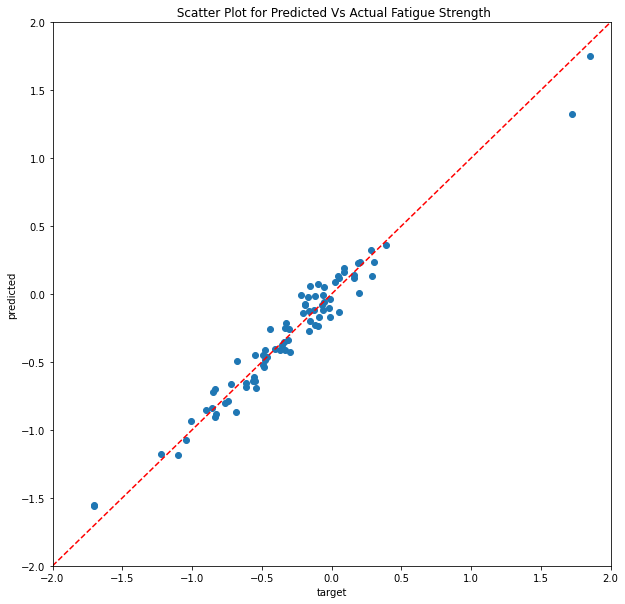

In [81]:
#Plot Actual versus the predicted fatigue strength
plt.figure(figsize=(10, 10))
plt.scatter(y_test,predicted_Final_SVC)
# dashed diagonal line
plt.plot([-2,2], [-2, 2], 'r--')
# x and y axis range
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# x and y labels|
plt.xlabel("target")
plt.ylabel("predicted")
plt.title(" Scatter Plot for Predicted Vs Actual Fatigue Strength")

### 4. Decision Tree Regression

In [82]:
from sklearn.tree import DecisionTreeRegressor 

In [83]:
model_Dtree = DecisionTreeRegressor()

In [84]:
# Set Grid Search Parameters
parameters = {'max_depth':range(3,20)}

In [85]:
grid_Dtree = GridSearchCV(model_Dtree, parameters,refit=True,verbose=10,cv=cv, scoring ='r2')

In [86]:
grid_Dtree.fit(X_train,y_train)

Fitting 10 folds for each of 17 candidates, totalling 170 fits
[CV 1/10; 1/17] START max_depth=3...............................................
[CV 1/10; 1/17] END ................max_depth=3;, score=0.935 total time=   0.0s
[CV 2/10; 1/17] START max_depth=3...............................................
[CV 2/10; 1/17] END ................max_depth=3;, score=0.847 total time=   0.0s
[CV 3/10; 1/17] START max_depth=3...............................................
[CV 3/10; 1/17] END ................max_depth=3;, score=0.915 total time=   0.0s
[CV 4/10; 1/17] START max_depth=3...............................................
[CV 4/10; 1/17] END ................max_depth=3;, score=0.937 total time=   0.0s
[CV 5/10; 1/17] START max_depth=3...............................................
[CV 5/10; 1/17] END ................max_depth=3;, score=0.955 total time=   0.0s
[CV 6/10; 1/17] START max_depth=3...............................................
[CV 6/10; 1/17] END ................max_depth=

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(3, 20)}, scoring='r2', verbose=10)

In [87]:
#Best Grid paramters using Cross fold validation
grid_Dtree.best_estimator_

DecisionTreeRegressor(max_depth=7)

In [88]:
predicted_Final_Dtree = grid_Dtree.predict(X_test)

In [89]:
print('Decision Tree MAE:', metrics.mean_absolute_error(y_test,predicted_Final_Dtree))
print('Decision Tree RMSE:', sqrt(metrics.mean_squared_error(y_test,predicted_Final_Dtree)))
print('Decision Tree R squared:', metrics.r2_score(y_test,predicted_Final_Dtree))
print('Decision Tree R squared:', sqrt(metrics.r2_score(y_test,predicted_Final_Dtree)))

Decision Tree MAE: 0.12387699702948916
Decision Tree RMSE: 0.17750969720869955
Decision Tree R squared: 0.9619760265392622
Decision Tree R squared: 0.9808037655613187


Text(0.5, 1.0, ' Scatter Plot for Predicted Vs Actual Fatigue Strength')

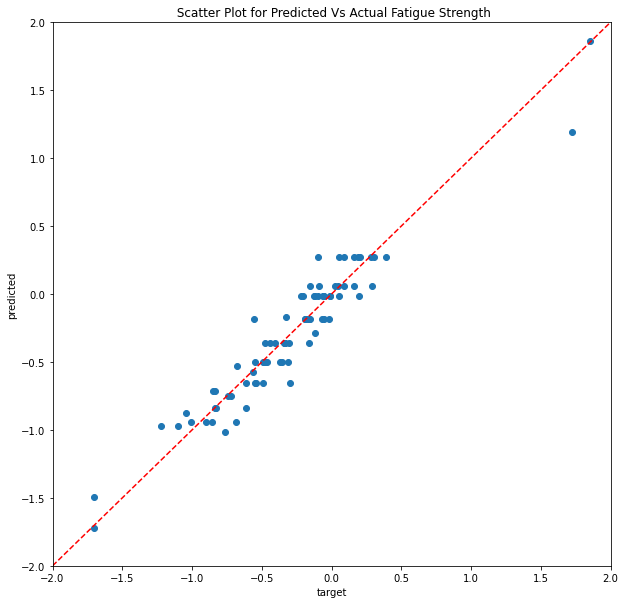

In [90]:
#Plot Actual versus the predicted fatigue strength
plt.figure(figsize=(10, 10))
plt.scatter(y_test,predicted_Final_Dtree)
# dashed diagonal line
plt.plot([-2,2], [-2, 2], 'r--')
# x and y axis range
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# x and y labels|
plt.xlabel("target")
plt.ylabel("predicted")
plt.title(" Scatter Plot for Predicted Vs Actual Fatigue Strength")

### 5. Artificial Neural Networks

In [91]:
# Initializing Artificial Neural Networks
Ann = tf.keras.models.Sequential()
# Defining the first hidden layer which is also the input layer
Ann.add(tf.keras.layers.Dense(units=20, input_dim=25, kernel_initializer='normal', activation='relu'))
Ann.add(tf.keras.layers.Dense(units=20, kernel_initializer='normal', activation='relu')) 
# The output neuron is a single fully connected node since we will be predicting a single number
Ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='normal'))

In [92]:
# Compiling the model
Ann.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
# Fitting the ANN to the Training set
Neural_network = Ann.fit(X_train, y_train ,batch_size = 20, epochs = 100, verbose=1,  callbacks=[tf.keras.callbacks.CSVLogger('his1.csv')])

Epoch 1/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 2/100
18/18 [==============================] - 0s 997us/step - loss: 0.0052
Epoch 3/100
18/18 [==============================] - 0s 961us/step - loss: 0.0052
Epoch 4/100
18/18 [==============================] - 0s 949us/step - loss: 0.0058
Epoch 5/100
18/18 [==============================] - 0s 829us/step - loss: 0.0056
Epoch 6/100
18/18 [==============================] - 0s 949us/step - loss: 0.0055
Epoch 7/100
18/18 [==============================] - 0s 889us/step - loss: 0.0061
Epoch 8/100
18/18 [==============================] - 0s 944us/step - loss: 0.0053
Epoch 9/100
18/18 [==============================] - 0s 939us/step - loss: 0.0054
Epoch 10/100
18/18 [==============================] - 0s 897us/step - loss: 0.0054
Epoch 11/100
18/18 [==============================] - 0s 939us/step - loss: 0.0061
Epoch 12/100
18/18 [==============================] - 0s 950us/step - loss: 0.0057
Epoch 13/100
18

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [95]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
	# create model
    return model

In [96]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

C:\Users\divam\AppData\Local\Temp/ipykernel_20368/3516041091.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)


In [97]:
scores_MAE_ANN = cross_val_score(estimator, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
scores_r2_ANN = cross_val_score(estimator, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)
scores_MSE_ANN = cross_val_score(estimator, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [99]:
# Performance Evaluation Metrics
from sklearn import metrics
print('ANN MAE:', mean(absolute(scores_MAE_ANN)))
print('ANN RMSE:', sqrt(mean(absolute(scores_MSE_ANN))))
print('ANN R squared:', mean(absolute(scores_r2_ANN)))
print('ANN R squared:',sqrt(mean(absolute(scores_r2_ANN))))

ANN MAE: 0.094659541882443
ANN RMSE: 0.15509055741329045
ANN R squared: 0.9804977305740789
ANN R squared: 0.9902008536524692


In [113]:
predicted_CV_ANN = Ann.predict(X_test)

Text(0.5, 1.0, ' Scatter Plot for Predicted Vs Actual Fatigue Strength')

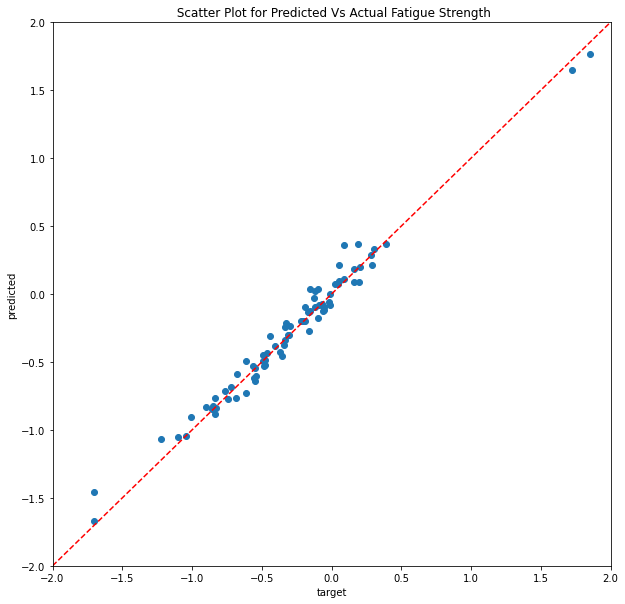

In [114]:
#Plot Actual versus the predicted fatigue strength
plt.figure(figsize=(10, 10))
plt.scatter(y_test,predicted_CV_ANN)
# dashed diagonal line
plt.plot([-2,2], [-2, 2], 'r--')
# x and y axis range
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# x and y labels|
plt.xlabel("target")
plt.ylabel("predicted")
plt.title(" Scatter Plot for Predicted Vs Actual Fatigue Strength")